In [ ]:
#Binary Classification
#Week 3

In [ ]:
#Declare Reference to General Libraries
import pandas as pd #Used to manipulate data sets (derived from PANel DAta) pd is an alias
import numpy as np #Used to work with arrays and matrices (e.g. useful for I/O validation)
import matplotlib.pyplot as plt #Used to generate statistical illustrations e.g. graphs
import seaborn as sns

#Import Special Data Analysis Packages
from sklearn.model_selection import train_test_split #Used to split the data set
from sklearn.linear_model import LogisticRegression #Selected moddelling algorithm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix #Used to evaluate the model



Rows Columns
(1372, 5)
   variance    skew  curtosis  entropy  Authentic
0   3.62160  8.6661   -2.8073 -0.44699          0
1   4.54590  8.1674   -2.4586 -1.46210          0
2   3.86600 -2.6383    1.9242  0.10645          0
3   3.45660  9.5228   -4.0112 -3.59440          0
4   0.32924 -4.4552    4.5718 -0.98880          0

 Authentic
0    762
1    610
Name: count, dtype: int64


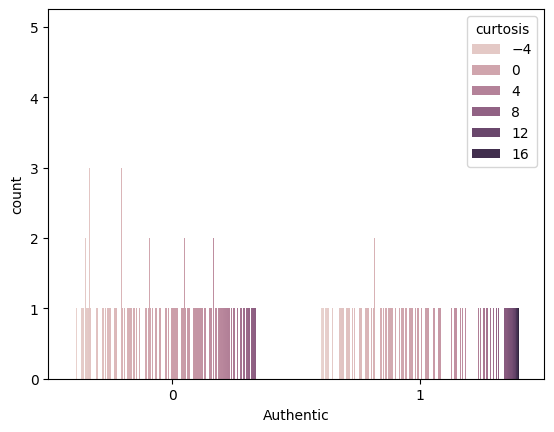

In [ ]:
#Read and Display Data Set

#First, read in CSV and assign it to a variable called "data"
data = pd.read_csv("banknote_authentication.csv")

#Second, display maximum rows and columns
print('\nRows Columns') #Indicates rows and columns
print(data.shape) #gets the number of rows and columns of data set

#Third, display first five rows to check data
print(data.head(5))

#Select last column (assuming the last column is the class)
last_column = data.iloc[:, -1] #using iloc to select the last column

#Count occurences of 0's and 1's
value_counts = last_column.value_counts()

#Print the value counts and check for imbalance
print('\n' , value_counts)

sns.countplot(x="Authentic", data=data)
plt.show
plt.clf()
sns.countplot(x="Authentic", data=data, hue="curtosis")
plt.show()

Axes(0.125,0.11;0.62x0.77)


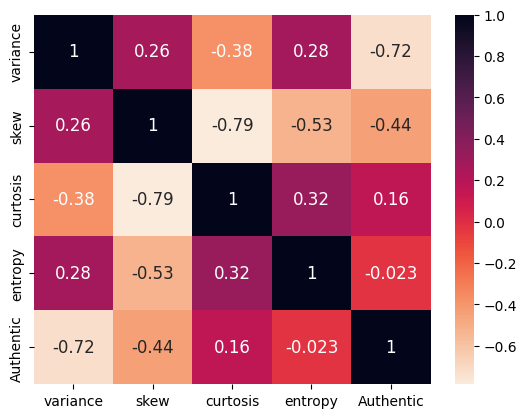

In [ ]:
#Display Feature Relations of Data Set
print(sns.heatmap(data.corr(),annot=True, annot_kws={"size":12}, cmap= sns.cm.rocket_r))

In [ ]:
#Declare X and Y Variables and Split the Dataset into Train and Test sections
X=data.drop(['Authentic'], axis=1).values #X Variables = all common except the last one

#Declare last column to be the Dependent variable Y
y=data['Authentic'].values #Y Variable = last column

#Split Data Set 70% training and 30% Testubg. Initial data shuffle to zero
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3, random_state=0)

In [ ]:
#Create and Test the Model

#First, declare a new model
classifier_model = LogisticRegression(max_iter=10000)

#Second, Train (fit) the model from the training data
classifier_model.fit(X_train, y_train)

#Third get Coefficients
print('\nIntercept = ', classifier_model.intercept_) #Find Bias Intercept
print('\nCoefficients = ', classifier_model.coef_)#Find Weightings

#Fourth, Test the model using the testing data
y_pred = classifier_model.predict(X_test)
print('\nTest Data Model = ', y_pred)


Intercept =  [3.55575249]

Coefficients =  [[-2.98863695 -1.76761289 -2.10993517 -0.19502051]]

Test Data Model =  [1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 0
 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 1 0 1 1 0]


In [ ]:
#Evaluate the Model: Display Confusion Matrix and Performance Metrics
print('\nConfusion Matrix = \n', confusion_matrix(y_test, y_pred))
print('\nAccuracy = ', accuracy_score(y_test, y_pred))
print('\nPrecision = ', precision_score(y_test, y_pred))
print('\nRecall = ', recall_score(y_test, y_pred))
print('\nF1 Score = ', f1_score(y_test, y_pred))


Confusion Matrix = 
 [[227   5]
 [  0 180]]

Accuracy =  0.9878640776699029

Precision =  0.972972972972973

Recall =  1.0

F1 Score =  0.9863013698630136


In [ ]:
#Validate the model with own (unseen) test data
Banknote_columns = []
print("\nEnter values for independent variables: ")

#Collect user input for each feature by:
#Retrieve column names from data frame
#Read in the user input
#Validate the model with own (unseen) test data
Banknote_columns = []
print("\nEnter values for independent variables: ")

#Collect user input for each feature by:
#Retrieve column names from data frame
#Read in the user input
#Write and update a list

for i, column_name in enumerate(data.columns[:-1]):
          value = float(input(f"{column_name}: "))
          Banknote_columns.append(value)

#Convert the outcome to a NumPy array and reshape
Banknote_columns = np.array(Banknote_columns).reshape(1, -1) #Reshape for single prediction

#Predict the outcome using the Logistic regression model
predicted_cost = classifier_model.predict(Banknote_columns)
print(f"\nAuthentic?: ", {predicted_cost[0]})


Enter values for independent variables: 

Enter values for independent variables: 


KeyboardInterrupt: Interrupted by user